# Движение тела в поле тяготения звезды

### Задача
Планета движется в поле тяготения от звезды массы $M=1.98*10^{33}$ г, с
прицельным параметром $R=150*10^9$ м со скоростью 30000 м/c.
Уравнения решать методом Рунге-Кутты четвёртого порядка. Использовать
нормирование параметров,расстояния, скорости, времени. Построить траекторию
движения планеты в графике $x(y)$. Нарисовать зависимости $x(t)$, $y(t)$, $v_x(t)$, $v_y(t)$.

### Теория
**Критическая скорость** $v_{\text{crit}}$ — это минимальная скорость, необходимая для того, чтобы тело, находящееся на орбите вокруг другого тела, оставалось на этой орбите и не вылетало. Это скорость, которая определяет круговую орбиту, когда тело движется по орбите с постоянной скоростью, не уходя в бесконечность или не падая на центральное тело.

Для орбиты вокруг звезды (или другого тела), критическая скорость $v_{\text{crit}}$ на круговой орбите определяется формулой:
$
v_{\text{crit}} = \sqrt{\frac{GM}{R}},
$  
где:
- $ G $ — гравитационная постоянная,
- $ M $ — масса центрального тела (в вашем случае Солнце),
- $ R $ — расстояние от тела до центрального объекта (например, расстояние от Земли до Солнца).

Если скорость тела меньше критической, его орбита будет **эллиптической**. Если скорость тела больше критической, орбита будет **параболической** или **гиперболической**.

- **$ v_0 = v_{\text{crit}} $**: круговая орбита.
- **$ v_0 < v_{\text{crit}} $**: эллиптическая орбита.
- **$ v_0 = \sqrt{2} \cdot v_{\text{crit}} $**: параболическая орбита.
- **$ v_0 > \sqrt{2} \cdot v_{\text{crit}} $**: гиперболическая орбита.

#### Почему важно понимать это?
Знание критической скорости позволяет предсказать, какая орбита будет у объекта в зависимости от его начальных условий. Если начальная скорость больше критической, объект покинет орбиту и улетит в космос. Если начальная скорость меньше критической, объект останется на орбите, но эта орбита будет эллиптической и, возможно, нестабильной.

### Решение

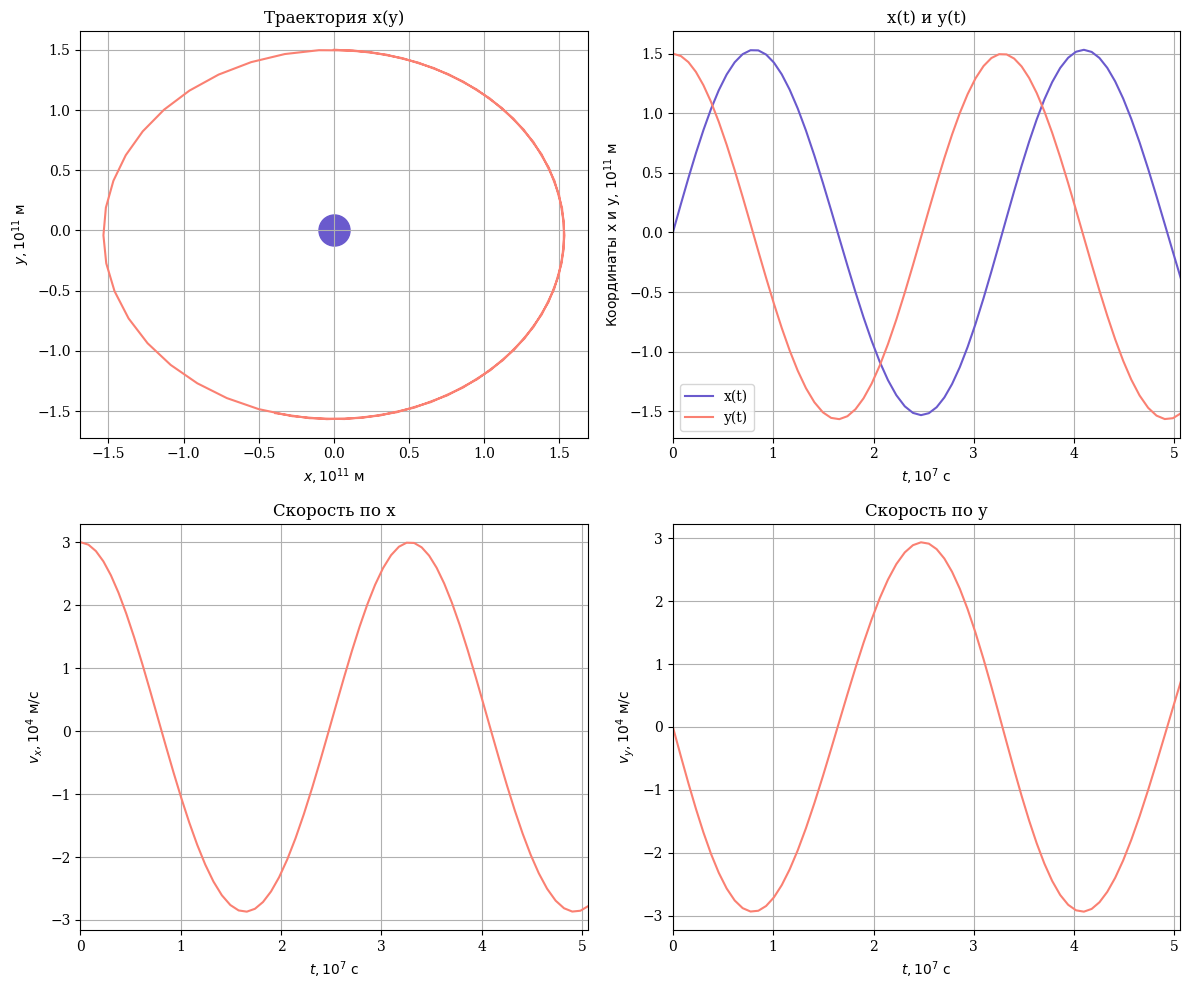

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
G = 6.67 # 10^11  Н*м^2/кг^2 = м^3 / (кг * с^2).
M = 1.98  # 10^30 кг
R = 1.5  # 10^11 м
v_crit = np.sqrt(G * M / R)       # 29672 м/с
v0 = 30     # км/с = 10^3 м/с

# Примеры форм орбит
#v0 = v_crit    # круг 
#v0 = 0.8 * v_crit      # эллипс
#v0 = np.sqrt(2) * v_crit    # парабола
#v0 = np.sqrt(2) * v_crit * 1.2     # гипербола

# Нормирование
l_DML = R   # расстояния *10^11
t_DML = np.sqrt(R**3 / (G * M))  # времени 10^7 (0,505*10^7)

# Нормированные начальные условия
y0 = 1.0  # R/l_DML = 1
x0 = 0
vy0 = 0.0
vx0 = v0 * t_DML / l_DML * 1e-1 # 10^7/10^11*10^3
yv0 = [x0, y0, vx0, vy0]

# Параметры решения
t0 = 0
t_end = 10  # конечное время в безразмерных единицах
h0 = 0.01
tol = 1e-6

# Уравнения движения в безразмерной форме
def f(yv, t):
    x, y, vx, vy = yv
    r = np.sqrt(x**2 + y**2)
    ax = -x / r**3
    ay = -y / r**3
    return np.array([vx, vy, ax, ay])

# Вспомогательная функция для вычисления шага методом Рунге-Кутты
def kkkk(h, yv, t):
    k1 = f(yv, t)
    k2 = f(yv + k1 * h / 2, t + h / 2)
    k3 = f(yv + k2 * h / 2, t + h / 2)
    k4 = f(yv + k3 * h, t + h)
    yv = yv + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return yv

# Функция Рунге-Кутты
def RK4(f, t0, yv0, h0, t_end, tol):
    h = h0
    t = t0
    yv = np.array(yv0)
    
    all_t = [t]
    all_y = [yv]

    while t < t_end:
        yv1 = kkkk(h, yv, t)  # Основной шаг
        h_half = h / 2
        yv2 = kkkk(h_half, yv, t)  # Два шага с половинным шагом
        yv2 = kkkk(h_half, yv2, t)

        error = np.max(np.abs(yv1 - yv2))
        if error > tol:
            h = h * 0.9 * (tol / error) ** 0.25
        else:
            t = t + h
            yv = yv1
            all_t.append(t)
            all_y.append(yv) # yv должен быть массивом из 4 элементов [x, y, v_x, v_y]
            h = h * 0.9 * (tol / error) ** 0.2


    return np.array(all_t), np.array(all_y)

# Численное решение
t_vals, y_vals = RK4(f, t0, yv0, h0, t_end, tol)
# y_vals = np.array([
#    [x_0, y_0, v_x0, v_y0],   # В начальный момент времени
#    [x_1, y_1, v_x1, v_y1],   # Через первый временной шаг
#    [x_2, y_2, v_x2, v_y2],   # Через второй временной шаг
#    ... ])

# Извлечение координат
x = y_vals[:, 0]
y = y_vals[:, 1]
vx = y_vals[:, 2]
vy = y_vals[:, 3]


# Построение графиков
plt.figure(figsize=(12, 10))
plt.rcParams["font.family"] = "serif" # font

# Траектория x(y)
plt.subplot(2, 2, 1)
plt.scatter(0, 0, color='slateblue', s=500, label="Центр (планета)")
plt.plot(x*R, y*R, label="Траектория", color="salmon")
plt.xlabel(r"$x, 10^{11} \text{ м}$")
plt.ylabel(r"$y, 10^{11} \text{ м}$")
plt.title("Траектория x(y)")
plt.grid()

# x(t) и y(t)
plt.subplot(2, 2, 2)
plt.xlim(t0, t_end * t_DML)
plt.plot(t_vals * t_DML, x*R, label="x(t)", color="slateblue")
plt.plot(t_vals * t_DML, y*R, label="y(t)", color="salmon")
plt.xlabel(r"$t, 10^7 \text{ с}$")
plt.ylabel(r"$\text{Координаты x и y, } 10^{11} \text{ м}$")
plt.title("x(t) и y(t)")
plt.grid()
plt.legend()

# vx(t)
plt.subplot(2, 2, 3)
plt.xlim(t0, t_end * t_DML)
plt.plot(t_vals * t_DML, vx / t_DML * l_DML, label="v_x(t)", color="salmon")
plt.xlabel(r"$t, 10^7 \text{ с}$")
plt.ylabel(r"$v_x, 10^{4} \text{ м/с}$")
plt.title("Скорость по x")
plt.grid()

# vy(t)
plt.subplot(2, 2, 4)
plt.xlim(t0, t_end * t_DML)
plt.plot(t_vals * t_DML, vy / t_DML * l_DML, label="v_y(t)", color="salmon")
plt.xlabel(r"$t, 10^7 \text{ с}$")
plt.ylabel(r"$v_y, 10^{4} \text{ м/с}$")
plt.title("Скорость по y")
plt.grid()

plt.tight_layout()
plt.show()